#### Assignment - Perform K Means, Hierarchical, and DBSCAN clustering on a datset of my choice

In [4]:
# Initialise chosen dataset
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Plastic Waste Around the World.csv")
df.head()


,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low


In [21]:
# Data formatting
# One hot encode Main_Sources column and label encode Coastal_Waste_Risk column
from sklearn.preprocessing import LabelEncoder

one_encoded = pd.get_dummies(df, columns = ["Main_Sources"], dtype = int)
le = LabelEncoder()
fully_encoded = one_encoded.copy()
fully_encoded["Coastal_Waste_Risk"] = le.fit_transform(one_encoded["Coastal_Waste_Risk"])
fully_encoded.head()

,Country,Total_Plastic_Waste_MT,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk,Main_Sources_Automotive_Packaging,Main_Sources_Consumer_Goods,Main_Sources_Consumer_Packaging,Main_Sources_Electronics_Packaging,Main_Sources_Food_Packaging,Main_Sources_Industrial_Consumer,Main_Sources_Industrial_Packaging,Main_Sources_Packaging_Consumer,Main_Sources_Packaging_Electronics,Main_Sources_Packaging_Industrial
0,China,59.08,29.8,41.2,0,0,0,0,0,0,0,0,0,0,1
1,United States,42.02,32.1,127.5,2,0,0,0,0,0,0,0,1,0,0
2,India,26.33,11.5,19.3,0,0,1,0,0,0,0,0,0,0,0
3,Japan,7.99,84.8,63.2,2,0,0,0,0,0,0,0,0,1,0
4,Germany,6.28,56.1,75.6,1,1,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Coastal_Waste_Risk', ylabel='count'>

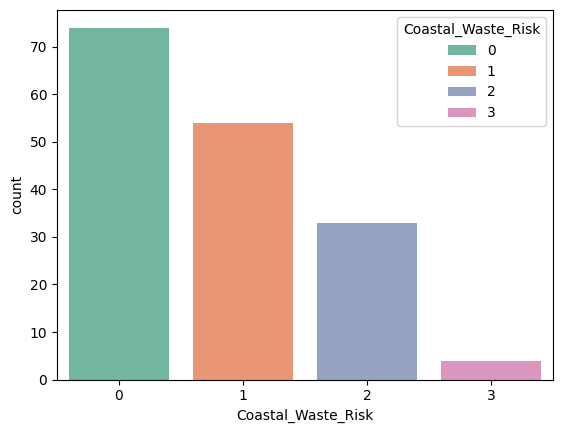

In [20]:
# EDA
# univariate analysis
df.describe()
sns.countplot(x = "Coastal_Waste_Risk", data = fully_encoded, hue = "Coastal_Waste_Risk", palette = "Set2") # classes are very imbalanced

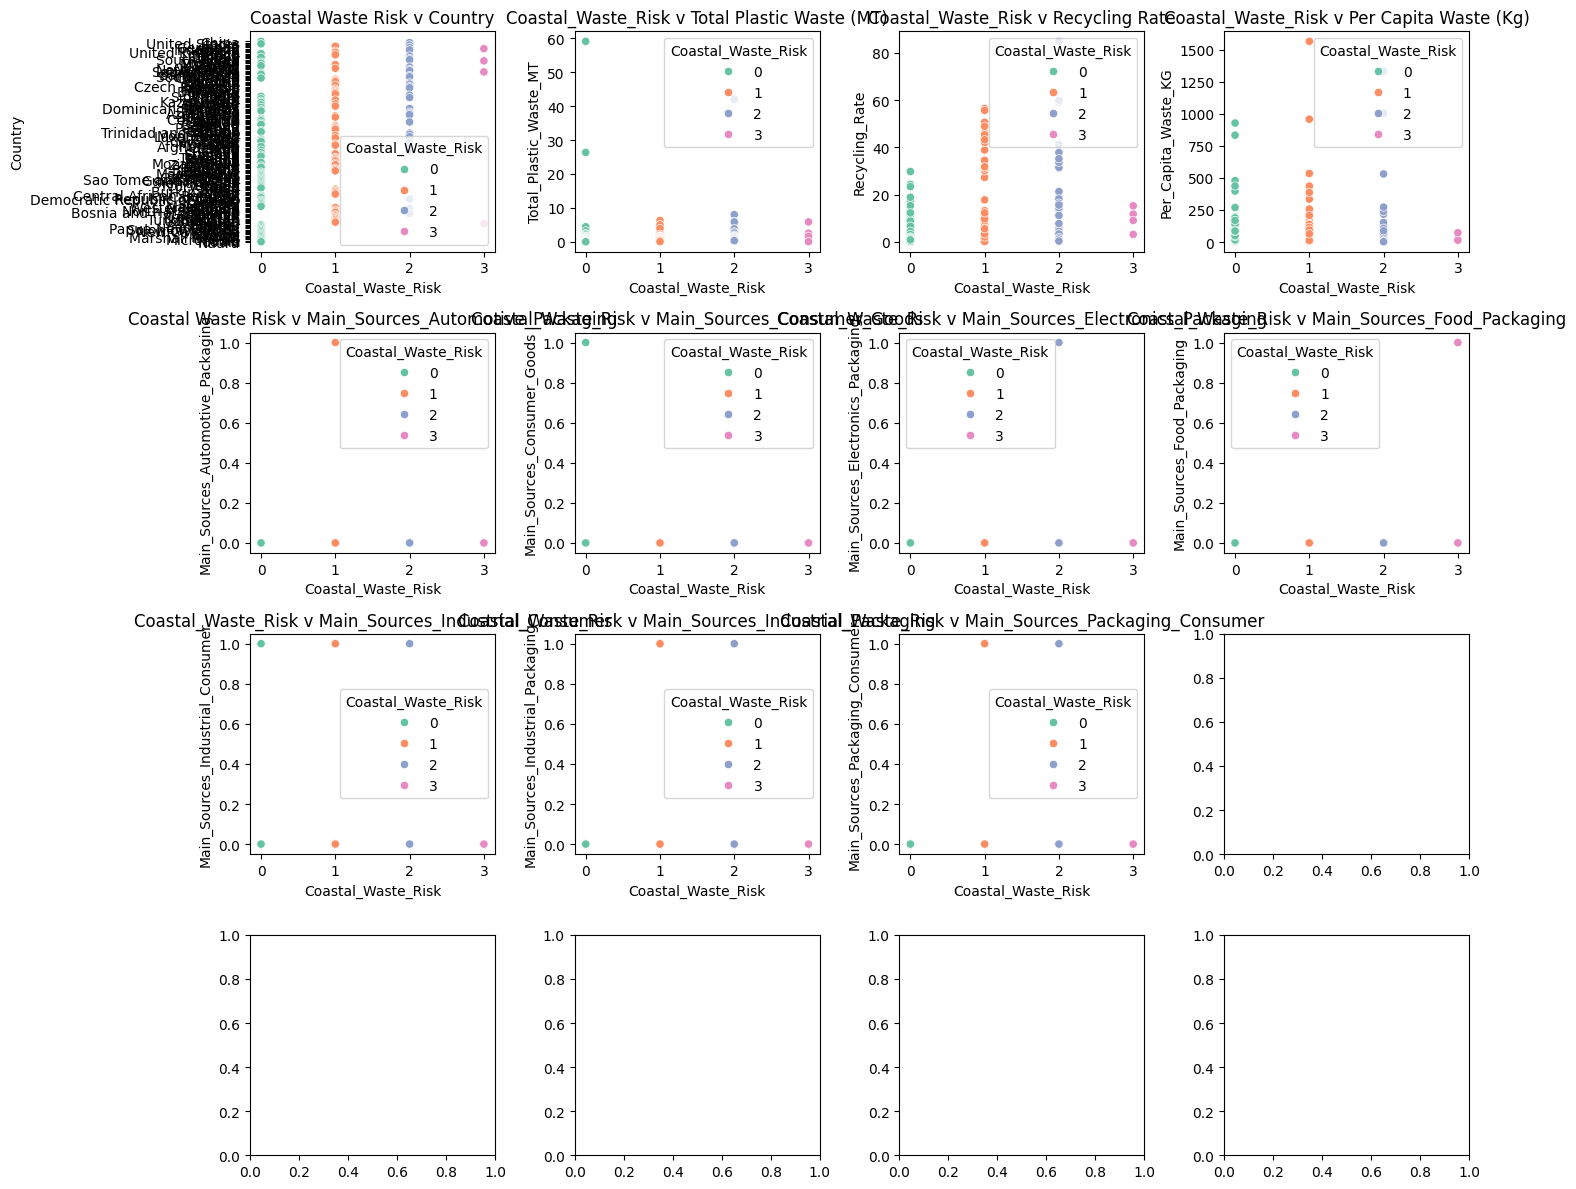

In [26]:
# bivariate analysis
fig, axes = plt.subplots(4, 4 , figsize = (15, 12))
axes = axes.flatten()  # flatten to 1D for easy looping

y_vars = [
    ("Country", "Coastal Waste Risk v Country"),
    ("Total_Plastic_Waste_MT", "Coastal_Waste_Risk v Total Plastic Waste (MT)"),
    ("Recycling_Rate", "Coastal_Waste_Risk v Recycling Rate"),
    ("Per_Capita_Waste_KG", "Coastal_Waste_Risk v Per Capita Waste (Kg)"),
    ("Main_Sources_Automotive_Packaging", "Coastal Waste Risk v Main_Sources_Automotive_Packaging"),
    ("Main_Sources_Consumer_Goods", "Coastal_Waste_Risk v Main_Sources_Consumer_Goods"),
    ("Main_Sources_Electronics_Packaging", "Coastal_Waste_Risk v Main_Sources_Electronics_Packaging"),
    ("Main_Sources_Food_Packaging", "Coastal_Waste_Risk v Main_Sources_Food_Packaging"),
    ("Main_Sources_Industrial_Consumer", "Coastal_Waste_Risk v Main_Sources_Industrial_Consumer"),
    ("Main_Sources_Industrial_Packaging", "Coastal_Waste_Risk v Main_Sources_Industrial_Packaging"),
    ("Main_Sources_Packaging_Consumer", "Coastal_Waste_Risk v Main_Sources_Packaging_Consumer")
]

for ax, (y_var, title) in zip(axes, y_vars):
    sns.scatterplot(
        x = "Coastal_Waste_Risk", y = y_var,
        data = fully_encoded, hue = "Coastal_Waste_Risk",
        palette = 'Set2', ax = ax
    )
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [27]:
# Multivariate Analysis
corr = fully_encoded.corr()
sns.heatmap(corr, annot = True, cmap = 'RdBu_r', fmt = '.2f')


import matplotlib.patches as patches # formatting to highlight target variable

ax = plt.gca()
n = corr.columns.get_loc("Coastal_Waste_Risk") 
i = corr.index.get_loc("Coastal_Waste_Risk")
border1 = patches.Rectangle((n, 0), 1, corr.shape[0], linewidth = 2, edgecolor = 'gold', facecolor = 'none')
border2 = patches.Rectangle((0, i), corr.shape[0], 1, linewidth = 2, edgecolor = 'gold', facecolor = 'none')
ax.add_patch(border1)
ax.add_patch(border2)

plt.title('Feature Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'China'

In [31]:
# COME BACK TO EDA LATER
# Preprocessing for clustering
# Drop Country column, one hot encode Main_Sources and Coastal_Waste_Risk, and scale numeric columns
df2 = df.drop("Country", axis = 1)
df_cluster = pd.get_dummies(df2, columns = ["Main_Sources", "Coastal_Waste_Risk"], dtype = int)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df[["Total_Plastic_Waste_MT", "Recycling_Rate", "Per_Capita_Waste_KG"]]
X_scaled = scaler.fit_transform(X)


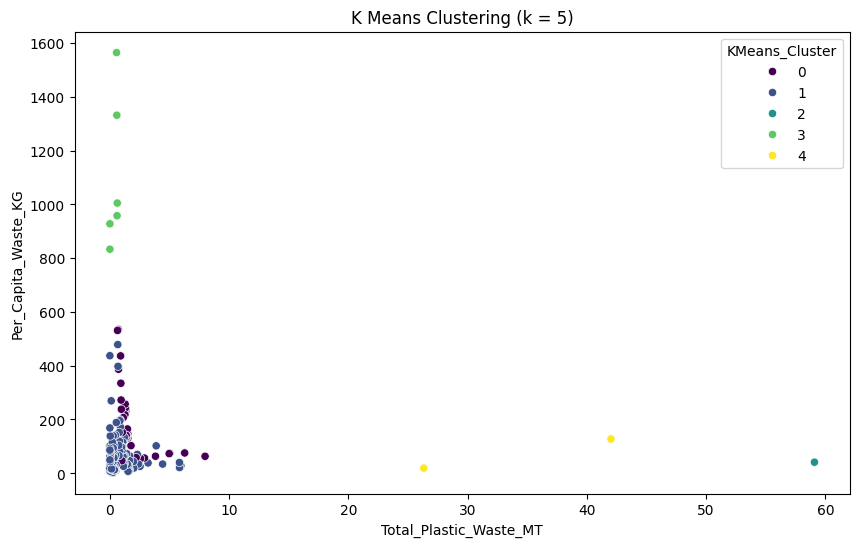

In [33]:
# K-means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(X_scaled)
df_cluster["KMeans_Cluster"] = kmeans.labels_

# Visualise K means clustering
plt.figure(figsize = (10,6))
sns.scatterplot(x = "Total_Plastic_Waste_MT", y = "Per_Capita_Waste_KG", hue = "KMeans_Cluster", data = df_cluster, palette = "viridis")
plt.title("K Means Clustering (k = 5)")
plt.show()

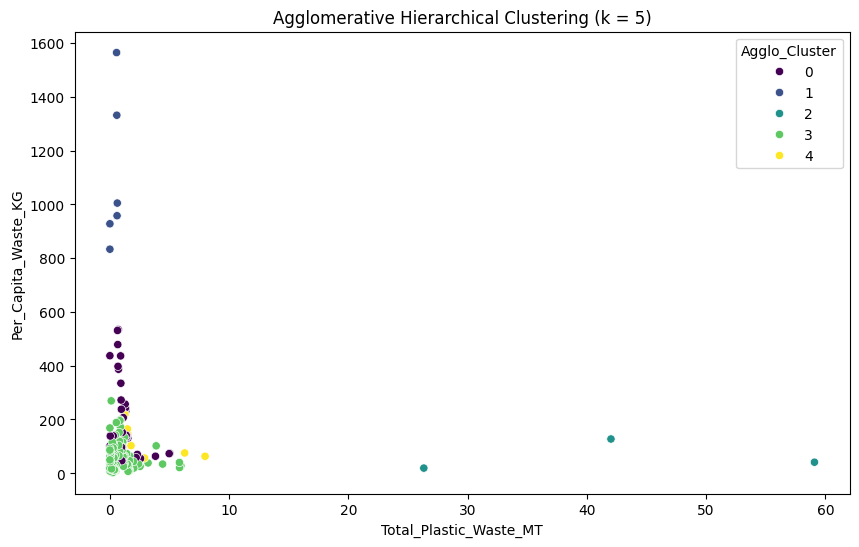

In [34]:
# Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters = 5)
df_cluster["Agglo_Cluster"] = agglo.fit_predict(X_scaled)

plt.figure(figsize = (10,6))
sns.scatterplot(x = "Total_Plastic_Waste_MT", y = "Per_Capita_Waste_KG", hue = "Agglo_Cluster", data = df_cluster, palette = 'viridis')
plt.title("Agglomerative Hierarchical Clustering (k = 5)")
plt.show()

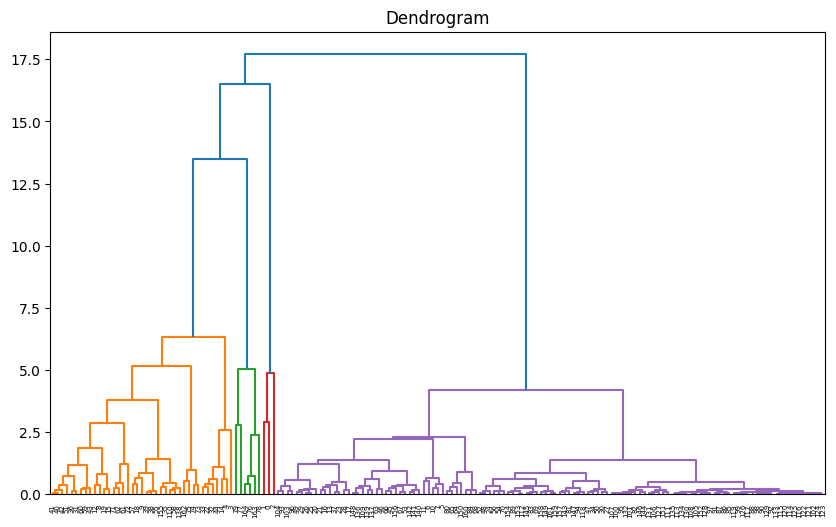

In [35]:
# Dendrogram for hierarcichal clustering
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_scaled, method = 'ward')
plt.figure(figsize = (10,6))
dendrogram(linked, orientation = 'top', distance_sort = 'descending', show_leaf_counts = True)
plt.title("Dendrogram")
plt.show()

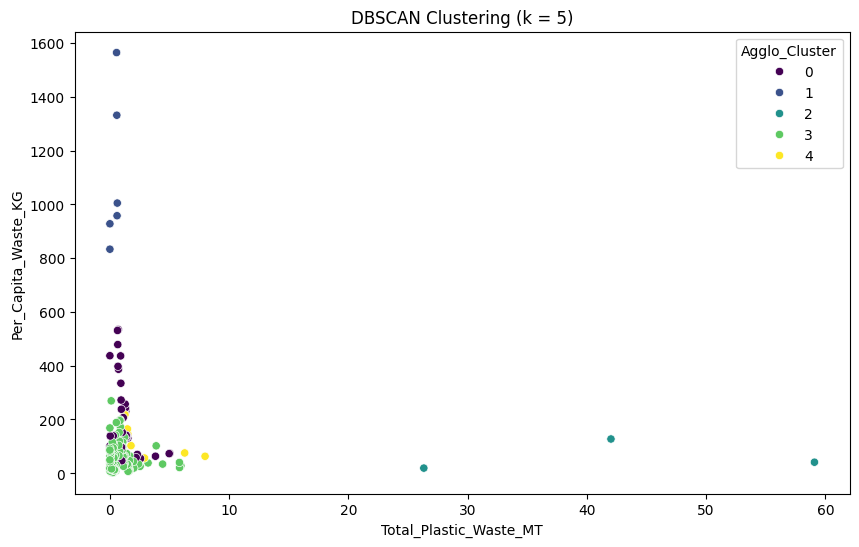

In [37]:
# DBSCAN clustering
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.5, min_samples = 5)
df_cluster["DBSCAN_Cluster"] = dbscan.fit_predict(X_scaled)

plt.figure(figsize = (10,6))
sns.scatterplot(x = "Total_Plastic_Waste_MT", y = "Per_Capita_Waste_KG", hue = "Agglo_Cluster", data = df_cluster, palette = 'viridis')
plt.title("DBSCAN Clustering (k = 5)")
plt.show()

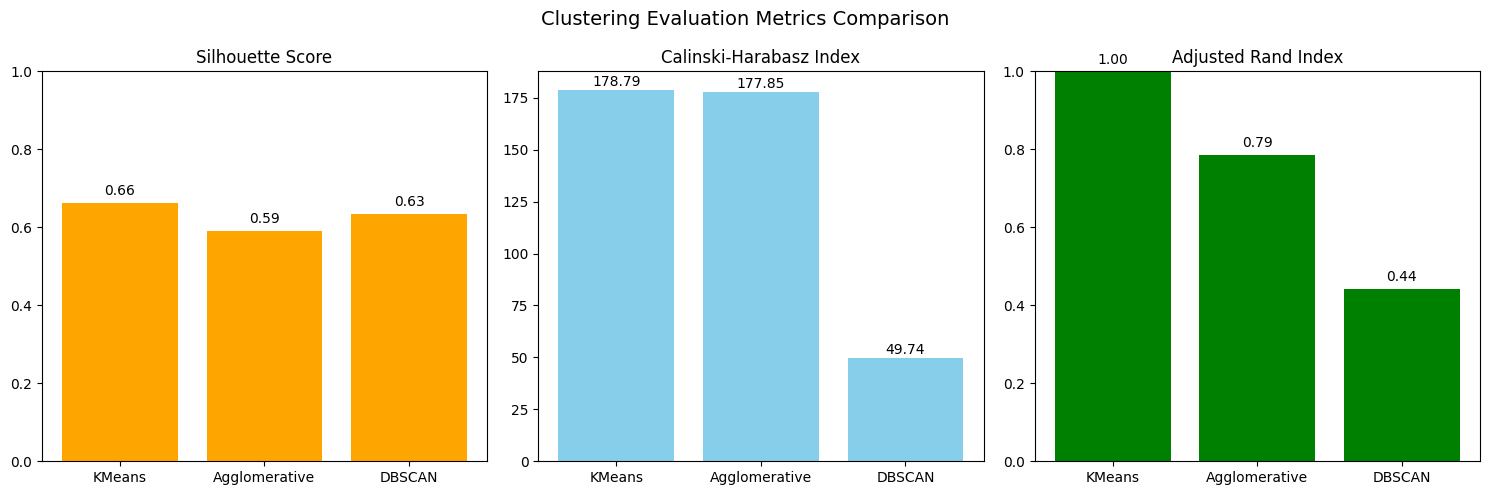

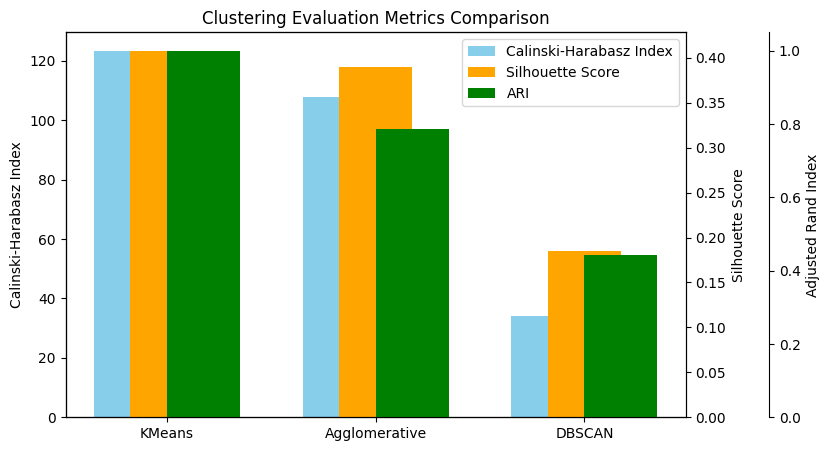

In [42]:
# Evaluating all clustering methods used
from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_rand_score

kmeans_sil = silhouette_score(X_scaled, kmeans.labels_)
agglo_sil = silhouette_score(X_scaled, agglo.labels_)
dbscan_sil = silhouette_score(X_scaled, dbscan.labels_)

kmeans_chi = calinski_harabasz_score(X_scaled, kmeans.labels_)
agglo_chi = calinski_harabasz_score(X_scaled, agglo.labels_)
dbscan_chi = calinski_harabasz_score(X_scaled, dbscan.labels_)

kmeans_ari = adjusted_rand_score(kmeans.labels_, kmeans.labels_)  
agglo_ari = adjusted_rand_score(kmeans.labels_, agglo.labels_)
dbscan_ari = adjusted_rand_score(kmeans.labels_, dbscan.labels_)

models = ["KMeans", "Agglomerative", "DBSCAN"]
silhouette = [kmeans_sil, agglo_sil, dbscan_sil]
calinski = [kmeans_chi, agglo_chi, dbscan_chi]
rand_index = [kmeans_ari, agglo_ari, dbscan_ari]

fig, axes = plt.subplots(1, 3, figsize=(15,5))

# Silhouette
axes[0].bar(models, silhouette, color="orange")
axes[0].set_title("Silhouette Score")
axes[0].set_ylim(0,1)
for i,v in enumerate(silhouette):
    axes[0].text(i, v+0.02, f"{v:.2f}", ha='center')

# Calinski-Harabasz
axes[1].bar(models, calinski, color="skyblue")
axes[1].set_title("Calinski-Harabasz Index")
for i,v in enumerate(calinski):
    axes[1].text(i, v+2, f"{v:.2f}", ha='center')

# Adjusted Rand Index
axes[2].bar(models, rand_index, color="green")
axes[2].set_title("Adjusted Rand Index")
axes[2].set_ylim(0,1)
for i,v in enumerate(rand_index):
    axes[2].text(i, v+0.02, f"{v:.2f}", ha='center')

plt.suptitle("Clustering Evaluation Metrics Comparison", fontsize=14)
plt.tight_layout()
plt.show()


# Visual comparison of the evaluation metrics 
models = ["KMeans", "Agglomerative", "DBSCAN"]
calinski = [123.42, 107.83, 34.07]
silhouette = [0.408, 0.390, 0.185]

x = np.arange(len(models))  # positions
width = 0.35  # bar width

fig, ax1 = plt.subplots(figsize = (8,5))

# Plot Calinski-Harabasz Index on left axis
ax1.bar(x - width/2, calinski, width, label = "Calinski-Harabasz Index", color = 'skyblue')
ax1.set_ylabel("Calinski-Harabasz Index")
ax1.set_xticks(x)
ax1.set_xticklabels(models)

# Create second axis for Silhouette Score
ax2 = ax1.twinx()
ax2.bar(x, silhouette, width, label = "Silhouette Score", color = 'orange')
ax2.set_ylabel("Silhouette Score")

# Third axis for Adjusted Rand Index
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))  # shift third axis outward
ax3.bar(x + width/2, rand_index, width, label = "ARI", color = 'green')
ax3.set_ylabel("Adjusted Rand Index")

fig.legend(loc = 'upper right', bbox_to_anchor = (1,1), bbox_transform = ax1.transAxes)
plt.title("Clustering Evaluation Metrics Comparison")
plt.show()

Among the three clustering methods applied, KMeans produced the most well-defined and cohesive clusters, with the highest Silhouette Score (0.408) and Calinski-Harabasz Index (123.4), indicating relatively strong separation and compactness. Agglomerative clustering performed comparably, though slightly weaker (Silhouette Score 0.390, Calinski-Harabasz Index 107.8). In contrast, DBSCAN performed poorly on this dataset, with a low Silhouette Score (0.185) and Calinski-Harabasz Index (34.1), suggesting overlapping clusters and many points classified as noise. Overall, KMeans emerges as the most effective clustering approach for this dataset, providing the clearest grouping structure, followed by Agglomerative clustering, while DBSCAN appears unsuitable in this context.